In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Step 1: Generate 3D Data
np.random.seed(4)  # For reproducible results
mean = [0, 0, 0]
cov = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, 100)

In [3]:
# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_pca = pca.fit_transform(data)

In [7]:
# Plotting function
def plot_plane(ax, pca, data, scale=1, steps=10):
    # Generate points within the plane defined by the first two principal components
    x_axis, y_axis = pca.components_
    x_points = np.linspace(-scale, scale, steps) * np.sqrt(pca.explained_variance_[0])
    y_points = np.linspace(-scale, scale, steps) * np.sqrt(pca.explained_variance_[1])
    x_mesh, y_mesh = np.meshgrid(x_points, y_points)
    z_mesh = np.zeros(x_mesh.shape)

    # Convert the mesh points into the original space
    for i in range(x_mesh.shape[0]):
        for j in range(x_mesh.shape[1]):
            point = mean + x_axis * x_mesh[i, j] + y_axis * y_mesh[i, j]
            z_mesh[i, j] = point[2]

    # Plot the surface
    ax.plot_surface(
        x_mesh + mean[0], y_mesh + mean[1], z_mesh, alpha=0.3, color="yellow"
    )


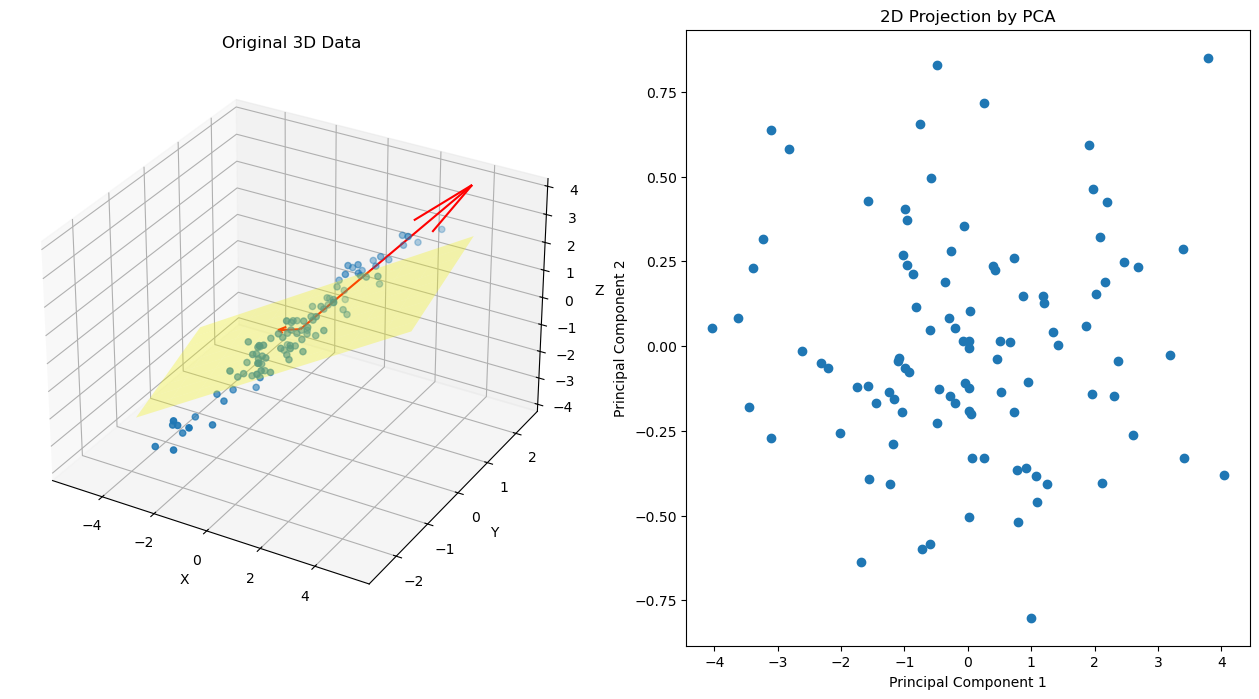

In [8]:
# Step 3: Visualize the Results
# Original 3D Data
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_title("Original 3D Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Plotting the principal components and the plane
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color="r")

plot_plane(ax, pca, data, scale=3)

# 2D Projection
ax2 = fig.add_subplot(122)
ax2.scatter(data_pca[:, 0], data_pca[:, 1])
ax2.set_title("2D Projection by PCA")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.show()

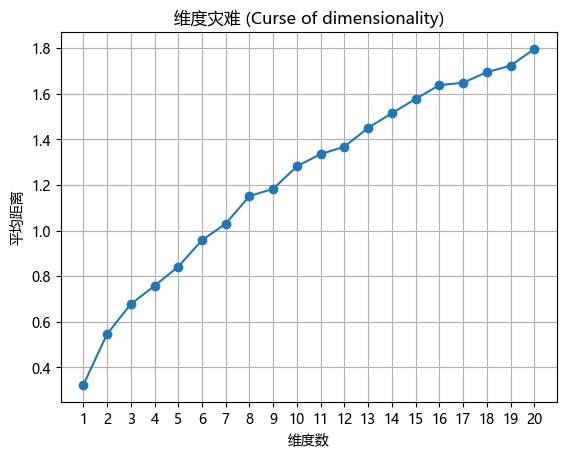

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc(group="font", family="Microsoft YaHei")


def generate_data(num_points, num_dimensions):
    return np.random.rand(num_points, num_dimensions)


def compute_average_distance(data):
    num_points, num_dimensions = data.shape
    total_distance = 0

    for i in range(num_points):
        for j in range(i + 1, num_points):
            distance = np.linalg.norm(data[i] - data[j])
            total_distance += distance

    return total_distance / (num_points * (num_points - 1) / 2)


def visualize_curse_of_dimensionality(max_dimensions, num_points_per_dimension):
    dimensions = list(range(1, max_dimensions + 1))
    avg_distances = []

    for d in dimensions:
        data = generate_data(num_points_per_dimension, d)
        avg_distance = compute_average_distance(data)
        avg_distances.append(avg_distance)

    # Plot the results
    plt.plot(dimensions, avg_distances, marker="o")
    plt.title("维度灾难 (Curse of dimensionality)")
    plt.xlabel("维度数")
    plt.xticks(range(1, max_dimensions + 1))
    plt.ylabel("平均距离")
    plt.grid(True)
    plt.show()


# Parameters
max_dimensions = 20
num_points_per_dimension = 100

# Visualize the curse of dimensionality
visualize_curse_of_dimensionality(max_dimensions, num_points_per_dimension)

In [13]:
from matplotlib.font_manager import FontManager

mpl_fonts = set(f.name for f in FontManager().ttflist)

print("all font list get from matplotlib.font_manager:")
for f in sorted(mpl_fonts):
    print("\t" + f)


all font list get from matplotlib.font_manager:
	Arial
	Bahnschrift
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Calibri
	Cambria
	Candara
	CaskaydiaMono NF
	Century
	Century Gothic
	Comic Sans MS
	Consolas
	Constantia
	Corbel
	Courier New
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	DengXian
	Dubai
	Ebrima
	FZShuTi
	FZYaoTi
	FangSong
	Font Awesome 5 Brands
	Font Awesome 5 Free Regular
	Font Awesome 5 Free Solid
	FontAwesome
	Franklin Gothic Medium
	Gabriola
	Gadugi
	Garamond
	Georgia
	HoloLens MDL2 Assets
	Impact
	Ink Free
	Javanese Text
	KaiTi
	Leelawadee
	Leelawadee UI
	LiSu
	Lucida Console
	Lucida Sans Unicode
	MS Gothic
	MS Reference Sans Serif
	MS Reference Specialty
	MT Extra
	MV Boli
	Malgun Gothic
	Material Design Icons
	Material Design Icons 5.9.55
	Microsoft Himalaya
	Microsoft JhengHei
	Microsoft New Tai Lue
	Microsoft PhagsPa
	Microsoft Sans Serif
	Microsoft Tai Le
	Microsoft Uighur
	Microsoft YaHei
	Microsoft Yi Baiti
	